In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import glob
import os

In [3]:
# Ruta de los archivos JSON
ruta = r"C:\Users\User\Desktop\SOYHENRY\Trabajo Grupal\Dataset\Google\reviews-estados\review-Missouri"

# Lista de archivos JSON en la carpeta
archivos_json = glob.glob(os.path.join(ruta, "*.json"))

# Cargar los JSON correctamente
df_list = []
for archivo in archivos_json:
    try:
        df_temp = pd.read_json(archivo, lines=True)  # Usa lines=True para JSON línea por línea
        df_list.append(df_temp)
    except ValueError as e:
        print(f"Error al leer {archivo}: {e}")

# Concatenar los dataframes
df = pd.concat(df_list, ignore_index=True)


In [4]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.089882e+20,Tracy Reeder,1575932557871,1,This company seems like a great place to work ...,None,None,0x87c87e473635feb5:0x6de42f63fb4ad19b
1,1.004776e+20,Brett Stevens,1554489896899,5,None,None,None,0x87c87e473635feb5:0x6de42f63fb4ad19b
2,1.181701e+20,steven williams,1498137347552,5,None,None,None,0x87c87e473635feb5:0x6de42f63fb4ad19b
3,1.085274e+20,b,1511496601769,5,None,None,None,0x87c87e473635feb5:0x6de42f63fb4ad19b
4,1.034012e+20,Bekkah said,1505363292500,5,None,None,None,0x87c87e473635feb5:0x6de42f63fb4ad19b


In [5]:
# Cantidad de filas y columnas
df.shape

(1650000, 8)

In [6]:
# Ver los tipos de datos de cada columna
print(df.dtypes)

user_id    float64
name        object
time         int64
rating       int64
text        object
pics        object
resp        object
gmap_id     object
dtype: object


In [7]:
df.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [8]:
# Convertir las columnas  a tipo 'string'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('string')

In [9]:
df.duplicated().sum()

29950

In [10]:
# Filas duplicadas
duplicadas = df[df.duplicated(keep=False)]

# Ordenamos por todas las columnas para que se vean juntas
duplicadas = duplicadas.sort_values(by=df.columns.tolist())

# Mostramos el resultado
print(duplicadas)

             user_id                name           time  rating  \
607512  1.000000e+20  Patricia Henderson  1556472911932       3   
607559  1.000000e+20  Patricia Henderson  1556472911932       3   
577447  1.000017e+20      Heather Hanson  1570326679913       4   
577461  1.000017e+20      Heather Hanson  1570326679913       4   
705016  1.000017e+20        Teresa Curry  1501116069651       4   
...              ...                 ...            ...     ...   
876430  1.184427e+20         Scott Goeke  1492868681385       5   
564303  1.184442e+20       Marena Stokes  1536586611349       4   
564305  1.184442e+20       Marena Stokes  1536586611349       4   
785432  1.184446e+20       Jw Mcclanahan  1420487024582       5   
785439  1.184446e+20       Jw Mcclanahan  1420487024582       5   

                                                     text  pics  resp  \
607512  The receptionist was rude, slow, and seemed to...  <NA>  <NA>   
607559  The receptionist was rude, slow, and seem

In [11]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

In [12]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

user_id          0
name             0
time             0
rating           0
text        695368
pics       1581850
resp       1393669
gmap_id          0
dtype: int64

In [13]:
# Porcentaje de valores nulos por columna
(df.isnull().mean() * 100)

user_id     0.000000
name        0.000000
time        0.000000
rating      0.000000
text       42.922626
pics       97.642048
resp       86.026295
gmap_id     0.000000
dtype: float64

In [14]:
# Estadísticas descriptivas para columnas numéricas
df.describe() 

,user_id,time,rating
count,1.620050e+06,1.620050e+06,1.620050e+06
mean,1.092477e+20,1.554883e+12,4.329722e+00
std,5.311231e+18,4.162891e+10,1.098947e+00
min,1.000000e+20,1.147565e+12,1.000000e+00
25%,1.046528e+20,1.527354e+12,4.000000e+00
50%,1.092490e+20,1.557603e+12,5.000000e+00
75%,1.138524e+20,1.583554e+12,5.000000e+00
max,1.184467e+20,1.631126e+12,5.000000e+00


In [15]:
outliers = pd.DataFrame()

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers_col = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
    outliers = pd.concat([outliers, outliers_col])

print(f"Total de outliers detectados: {len(outliers)}")

Total de outliers detectados: 147245


In [16]:
# Ver de qué columnas vienen los outliers
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    cantidad = df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]
    print(f"{col}: {cantidad} outliers")

user_id: 0 outliers
time: 12287 outliers
rating: 134958 outliers


In [17]:
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
print("\nFechas convertidas:\n", df[['time', 'fecha']].head())


Fechas convertidas:
             time                   fecha
0  1575932557871 2019-12-09 23:02:37.871
1  1554489896899 2019-04-05 18:44:56.899
2  1498137347552 2017-06-22 13:15:47.552
3  1511496601769 2017-11-24 04:10:01.769
4  1505363292500 2017-09-14 04:28:12.500


In [18]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,fecha
0,1.089882e+20,Tracy Reeder,1575932557871,1,This company seems like a great place to work ...,<NA>,<NA>,0x87c87e473635feb5:0x6de42f63fb4ad19b,2019-12-09 23:02:37.871
1,1.004776e+20,Brett Stevens,1554489896899,5,<NA>,<NA>,<NA>,0x87c87e473635feb5:0x6de42f63fb4ad19b,2019-04-05 18:44:56.899
2,1.181701e+20,steven williams,1498137347552,5,<NA>,<NA>,<NA>,0x87c87e473635feb5:0x6de42f63fb4ad19b,2017-06-22 13:15:47.552
3,1.085274e+20,b,1511496601769,5,<NA>,<NA>,<NA>,0x87c87e473635feb5:0x6de42f63fb4ad19b,2017-11-24 04:10:01.769
4,1.034012e+20,Bekkah said,1505363292500,5,<NA>,<NA>,<NA>,0x87c87e473635feb5:0x6de42f63fb4ad19b,2017-09-14 04:28:12.500


# Analisis de Rating

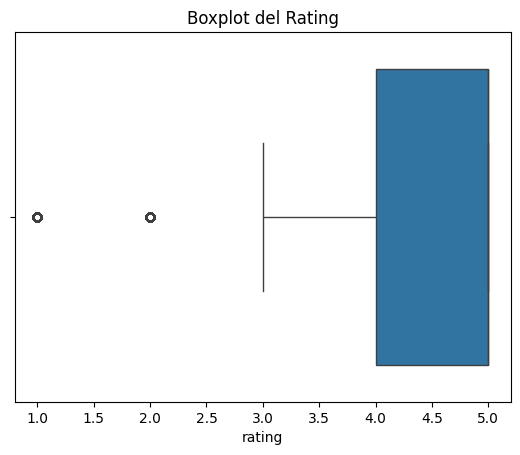

In [19]:
sns.boxplot(x='rating', data=df)
plt.title('Boxplot del Rating')
plt.show()

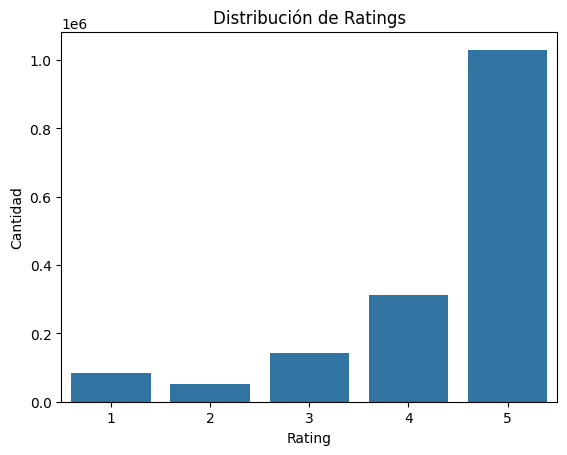

In [20]:
sns.countplot(x='rating', data=df)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()

In [21]:
# Contar cantidad de cada rating
rating_counts = df['rating'].value_counts().sort_index()

# Calcular porcentaje
rating_percentage = (rating_counts / len(df)) * 100

# Crear la tabla combinada
tabla_rating = pd.DataFrame({
    'Rating': rating_counts.index,
    'Cantidad': rating_counts.values,
    'Porcentaje (%)': rating_percentage.round(2)
})

# Mostrar la tabla
print(tabla_rating)

        Rating  Cantidad  Porcentaje (%)
rating                                  
1            1     84170            5.20
2            2     50788            3.13
3            3    141850            8.76
4            4    313140           19.33
5            5   1030102           63.58


Análisis:

Más del 80% de las reseñas tienen 4 o 5 estrellas → fuerte tendencia positiva.

Solo el 8% son críticas negativas (1 o 2 estrellas).

El valor más común es 5 estrellas, lo que podría indicar alta satisfacción.

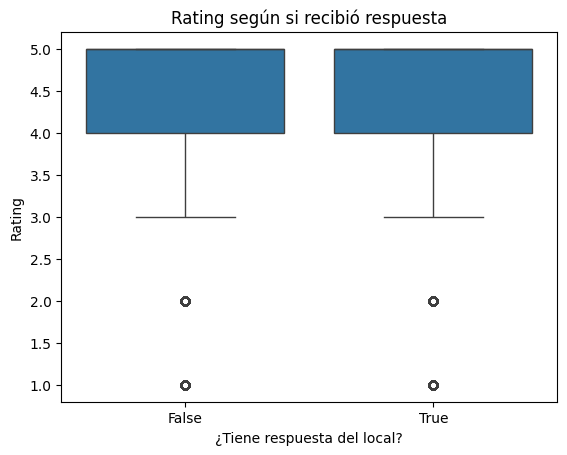

In [22]:
df['tiene_resp'] = df['resp'].notna()
sns.boxplot(x='tiene_resp', y='rating', data=df)
plt.title("Rating según si recibió respuesta")
plt.xlabel("¿Tiene respuesta del local?")
plt.ylabel("Rating")
plt.show()

Análisis:

No se muestra diferencias en la variacion de rating y la respuesta recibida

# Análisis de Review

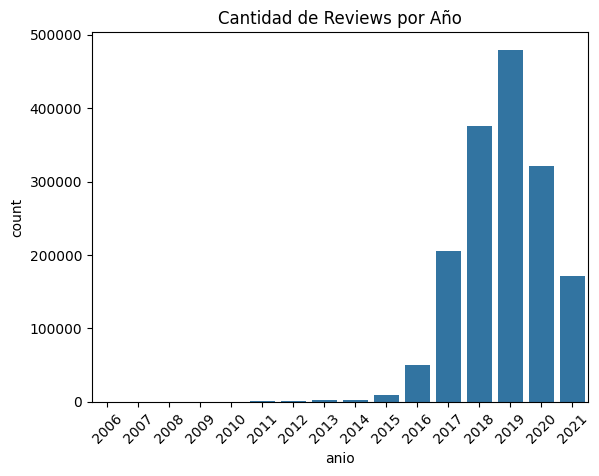

In [23]:
df['anio'] = df['fecha'].dt.year
sns.countplot(x='anio', data=df)
plt.title('Cantidad de Reviews por Año')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Asegurate de tener la columna 'anio' creada desde la fecha
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year

# Contar reviews por año
reviews_por_anio = df['anio'].value_counts().sort_index()

# Crear la tabla
tabla_reviews_anio = pd.DataFrame({
    'Año': reviews_por_anio.index,
    'Cantidad de Reviews': reviews_por_anio.values
})

# Mostrar la tabla
print(tabla_reviews_anio)

     Año  Cantidad de Reviews
0   2006                    3
1   2007                    9
2   2008                   14
3   2009                   30
4   2010                  204
5   2011                  897
6   2012                 1245
7   2013                 1987
8   2014                 2985
9   2015                 9107
10  2016                50858
11  2017               206104
12  2018               375114
13  2019               479328
14  2020               321192
15  2021               170973


Análisis:

Se muestra un fuerte crecimiento desde 2016, con picos en 2018 y 2019.
Máximo en 2019: más de 470.000 reviews.
Caída en 2020 y 2021, posiblemente relacionada con la pandemia (COVID-19 afectó la movilidad y el turismo).
Antes de 2016, el volumen de reseñas era muy bajo.

In [25]:
total_reviews = len(df)

text_count = df['text'].notna().sum()
pics_count = df['pics'].notna().sum()
resp_count = df['resp'].notna().sum()

print(f"Reviews con texto: {text_count} ({(text_count / total_reviews * 100):.2f}%)")
print(f"Reviews con fotos: {pics_count} ({(pics_count / total_reviews * 100):.2f}%)")
print(f"Reviews con respuesta: {resp_count} ({(resp_count / total_reviews * 100):.2f}%)")

Reviews con texto: 924682 (57.08%)
Reviews con fotos: 38200 (2.36%)
Reviews con respuesta: 226381 (13.97%)


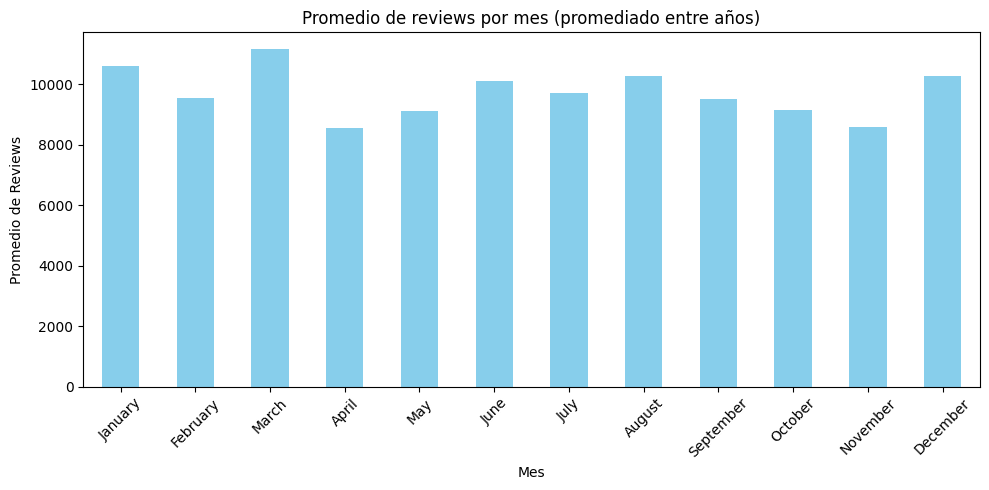

In [26]:
# Asegurar que las fechas están en formato datetime
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Agrupar por año y mes para contar reviews
grupo_anio_mes = df.groupby(['anio', 'mes']).size().reset_index(name='cantidad')

# Calcular promedio de reviews por mes (promediado entre años)
promedio_por_mes = grupo_anio_mes.groupby('mes')['cantidad'].mean()

# Asegurar que estén los 12 meses
promedio_por_mes = promedio_por_mes.reindex(range(1, 13), fill_value=0)



# Graficar
plt.figure(figsize=(10, 5))
promedio_por_mes.plot(kind='bar', color='skyblue')
plt.title("Promedio de reviews por mes (promediado entre años)")
plt.xlabel("Mes")
plt.ylabel("Promedio de Reviews")
plt.xticks(ticks=range(12), labels=[calendar.month_name[m] for m in range(1, 13)], rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Crear DataFrame con nombres de mes
tabla_reviews_mes = pd.DataFrame({
    'Mes': [calendar.month_name[m] for m in promedio_por_mes.index],
    'Promedio de Reviews': promedio_por_mes.values.round(2)
})

# Mostrar la tabla
print(tabla_reviews_mes)

          Mes  Promedio de Reviews
0     January             10620.00
1    February              9561.57
2       March             11163.38
3       April              8564.57
4         May              9132.20
5        June             10117.29
6        July              9701.47
7      August             10265.93
8   September              9509.86
9     October              9154.00
10   November              8600.36
11   December             10271.62


Análisis:

Actividad moderada en todo el año
Aunque no hay picos extremos, enero y marzo muestran una actividad más fuerte en promedio.

Meses más bajos: abril y septiembre
Estos meses tienden a tener menos reseñas en comparación con otros. Esto podría deberse a
temporada baja de turismo o consumo, 
condiciones climáticas o feriados que afectan el tráfico de personas.

No hay una estacionalidad clara y marcada
La diferencia entre los meses no es tan extrema como para pensar en una única temporada fuerte. Es una distribución relativamente estable, pero con altibajos sutiles.